In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [75]:
#df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df = pd.read_csv('medical_insurance_cost.csv')

In [76]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [78]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Analisis de Categorias

In [79]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

Cambiamos el sexo por un número
Creamos un diccionario

In [80]:
# Aplicamos map para cambiar el nombre del sexo por números
sex_dic = {'male':1,'female':0}
df['sex'] = df['sex'].map(sex_dic)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [81]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [82]:
smoker_dic = {'yes':1,'no':0}
df['smoker'] = df['smoker'].map(smoker_dic)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [83]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [84]:
region_dic = {'southeast':0,'southwest':1,'northwest':2,'northeast':3}
df['region'] = df['region'].map(region_dic)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


Analizar las variables numéricas
Chequear si variable dependiente está balanceada o no.

<AxesSubplot:>

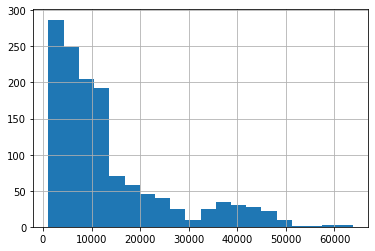

In [85]:
df['charges'].hist(bins=20)

<AxesSubplot:>

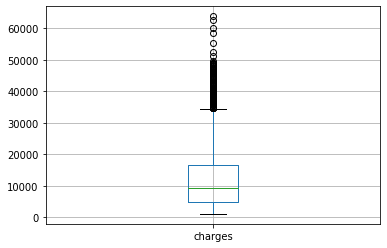

In [86]:
df.boxplot(column='charges')

In [87]:
df['charges_log'] = np.log10(df['charges']+10**-6) #le sumo 10^6 por si hay algún 0 o nulo
df

,age,sex,bmi,children,smoker,region,charges,charges_log
0,19,0,27.900,0,1,1,16884.92400,4.227499
1,18,1,33.770,1,0,0,1725.55230,3.236928
2,28,1,33.000,3,0,0,4449.46200,3.648308
3,33,1,22.705,0,0,2,21984.47061,4.342116
4,32,1,28.880,0,0,2,3866.85520,3.587358
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830,4.025328
1334,18,0,31.920,0,0,3,2205.98080,3.343602
1335,18,0,36.850,0,0,0,1629.83350,3.212143
1336,21,0,25.800,0,0,1,2007.94500,3.302752


<AxesSubplot:>

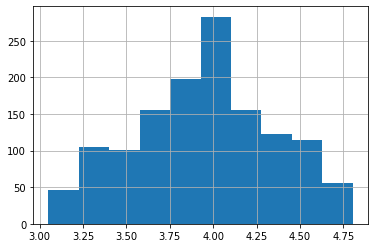

In [88]:
df['charges_log'].hist()
# para sacar la métrica real del error tenemos que realizar la inversa de la transformación.

<AxesSubplot:>

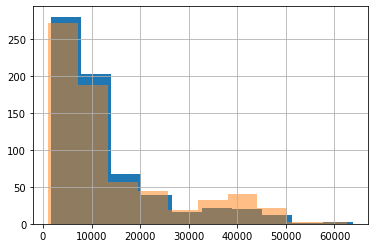

In [89]:
df['charges'][df['sex']==0].hist()
df['charges'][df['sex']==1].hist(alpha=0.5)

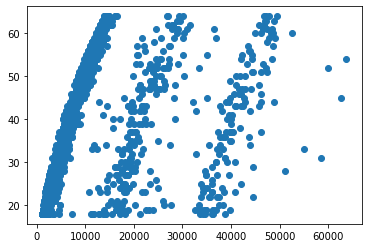

In [90]:
plt.plot(df['charges'],df['age'],'o')

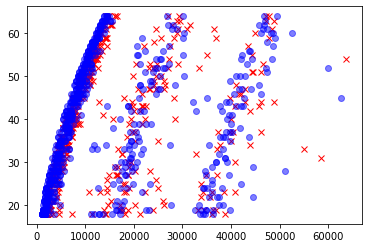

In [91]:
plt.plot(df['charges'][df['sex']==0],df['age'][df['sex']==0],'rx')
plt.plot(df['charges'][df['sex']==1],df['age'][df['sex']==1],'bo', alpha=0.5)

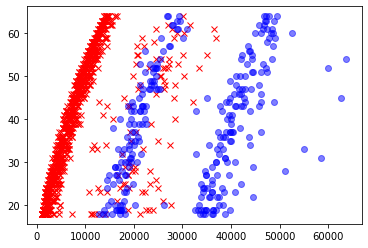

In [92]:
plt.plot(df['charges'][df['smoker']==0],df['age'][df['smoker']==0],'rx')
plt.plot(df['charges'][df['smoker']==1],df['age'][df['smoker']==1],'bo', alpha=0.5)

<AxesSubplot:>

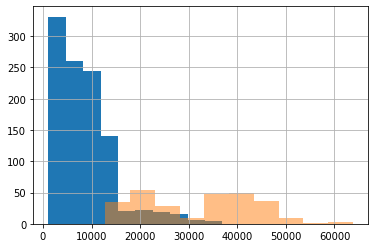

In [93]:
df['charges'][df['smoker']==0].hist()
df['charges'][df['smoker']==1].hist(alpha=0.5)

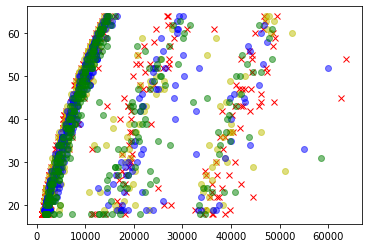

In [94]:
plt.plot(df['charges'][df['region']==0],df['age'][df['region']==0],'rx')
plt.plot(df['charges'][df['region']==1],df['age'][df['region']==1],'yo', alpha=0.5)
plt.plot(df['charges'][df['region']==2],df['age'][df['region']==2],'bo', alpha=0.5)
plt.plot(df['charges'][df['region']==3],df['age'][df['region']==3],'go', alpha=0.5)

Los fumadores siempre pagan más.
Parecería haber 3 "tipos" de seguros.
No parecería existir relación con la región.

Probando variables charges sin transformación:

In [95]:
X = df.drop(columns=['charges','charges_log'])
y = df['charges']

In [100]:
#dividimos los datos en 3 grupos 80/10/10

X_train, X_test_aux, y_train, y_test_aux = train_test_split(X,y, test_size=0.3, random_state=412)


In [101]:
print(X_train.shape,y_train.shape)
print(X_test_aux.shape,y_test_aux.shape)

(936, 6) (936,)
(402, 6) (402,)


In [102]:
X_val, X_test, y_val, y_test = train_test_split(X_test_aux,y_test_aux, test_size=0.5, random_state=142)


In [104]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(936, 6) (936,)
(201, 6) (201,)
(201, 6) (201,)


In [105]:
mi_modelo = LinearRegression()

In [106]:
mi_modelo.fit(X_train, y_train)

LinearRegression()

In [110]:
y_val_pred = mi_modelo.predict(X_val)
y_train_pred = mi_modelo.predict(X_train)

In [115]:
RMSE_train = mean_squared_error(y_train, y_train_pred, squared=False)
RMSE_val = mean_squared_error(y_val, y_val_pred, squared=False)
print('train:',RMSE_train, 'validation:',RMSE_val)


train: 6083.057967421364 validation: 6236.954250445496
